<a href="https://colab.research.google.com/github/PrajwalRaj21/DataScienceRepo/blob/main/CNN_vs_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


For this Comparison, I'll be using the CIFAR-10 Dataset.



# **Loading and Preprocessing Dataset**

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0  #normalizing pixel values to be between 0 and 1
x_test = x_test.astype('float32') / 255.0



y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)



# **Buidling and Training the CNN Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#defining the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])


cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #compiling the model


cnn_history = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))  #training the model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 68ms/step - accuracy: 0.4026 - loss: 1.6406 - val_accuracy: 0.5753 - val_loss: 1.1903
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 60ms/step - accuracy: 0.6197 - loss: 1.0745 - val_accuracy: 0.6555 - val_loss: 0.9814
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 57ms/step - accuracy: 0.6993 - loss: 0.8677 - val_accuracy: 0.6733 - val_loss: 0.9381
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 62ms/step - accuracy: 0.7512 - loss: 0.7114 - val_accuracy: 0.6945 - val_loss: 0.8928
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 57ms/step - accuracy: 0.8012 - loss: 0.5727 - val_accuracy: 0.7007 - val_loss: 0.9141
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 58ms/step - accuracy: 0.8521 - loss: 0.4316 - val_accuracy: 0.7030 - val_loss: 0.9460
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 57ms/step - accuracy: 0.8922 - loss: 0.3184 - val_accuracy: 0.6970 - val_loss: 1.0916
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 58ms/step - accuracy: 

The CNN model consists of convolutional layers followed by max pooling, flattening, and dense layers. The model is compiler with the Adam optimizer and trained on the training data.

# **Building and Training the MobileNetV2 Model**

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input

# Define the MobileNetV2 model
input_tensor = Input(shape=(32, 32, 3))
base_model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

# Add custom layers on top of MobileNetV2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
output_tensor = Dense(10, activation='softmax')(x)

mobilenet_model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
mobilenet_history = mobilenet_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


<ipython-input-6-60c464f9c183>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 389s 226ms/step - accuracy: 0.4523 - loss: 1.6294 - val_accuracy: 0.4478 - val_loss: 1.8474
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 372s 219ms/step - accuracy: 0.6481 - loss: 1.0521 - val_accuracy: 0.3702 - val_loss: 2.8195
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 378s 217ms/step - accuracy: 0.6235 - loss: 1.0974 - val_accuracy: 0.3269 - val_loss: 2.3909
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 384s 218ms/step - accuracy: 0.6364 - loss: 1.0745 - val_accuracy: 0.4517 - val_loss: 2.5086
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 384s 219ms/step - accuracy: 0.6684 - loss: 0.9769 - val_accuracy: 0.4893 - val_loss: 1.7606
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 391s 225ms/step - accuracy: 0.6688 - loss: 0.9578 - val_accuracy: 0.3783 - val_loss: 2.3648
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 381s 224ms/step - accuracy: 0.6451 - loss: 1.0236 - val_accuracy: 0.3828 - val_loss: 2.0576
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 372s 218ms/step - ac

# **Evaluating Both Models**

In [ ]:
#Evaluating CNN
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test)
print(f"CNN Test Accuracy: {cnn_test_acc}")

mobilenet_test_loss, mobilenet_test_acc = mobilenet_model.evaluate(x_test, y_test)
print(f"MobileNetV2 Test Accuracy: {mobilenet_test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7025 - loss: 1.4981
CNN Test Accuracy: 0.6992999911308289
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.4601 - loss: 1.9153
MobileNetV2 Test Accuracy: 0.4607999920845032


# **Analysis Visualization**

# 1. Plotting CNN Training History

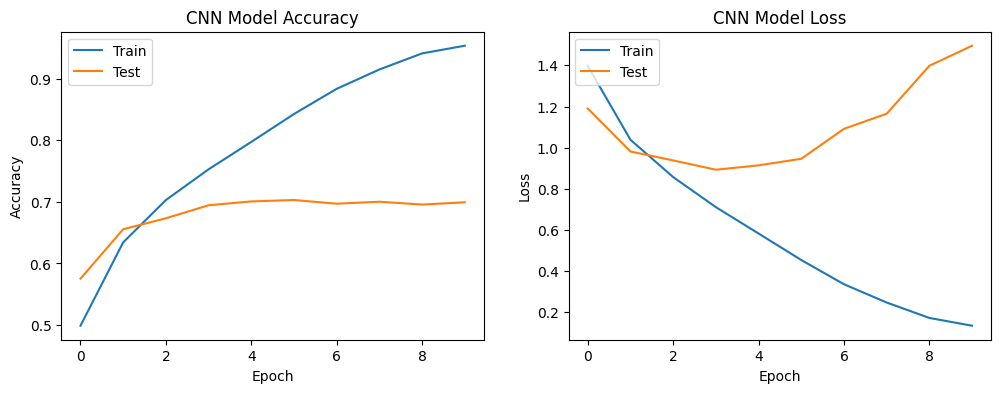

In [ ]:
import matplotlib.pyplot as plt

# Plotting CNN training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plotting CNN training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()




*   The first subplot shows the accuracy over epochs for the training and validation sets

*   The second subplot shows the loss over epochs for the training and validation sets.



# 2. Plotting Training History for MobileNetV2 Model

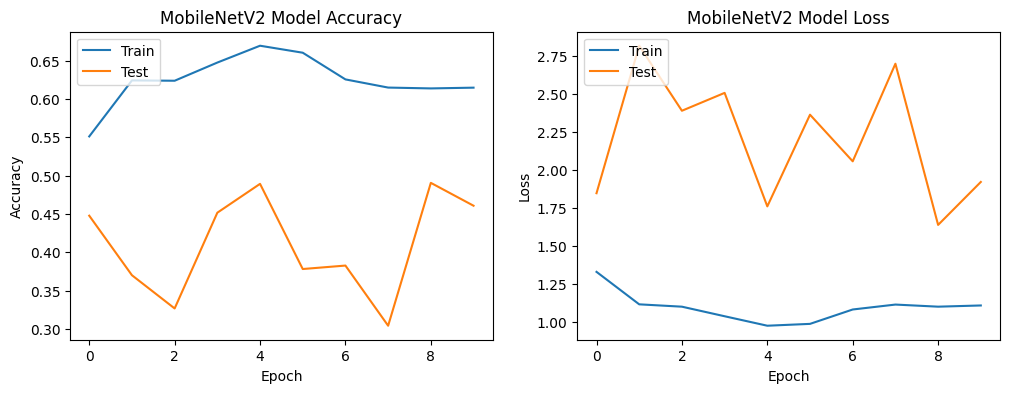

In [ ]:
# Plot MobileNetV2 training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(mobilenet_history.history['accuracy'])
plt.plot(mobilenet_history.history['val_accuracy'])
plt.title('MobileNetV2 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot MobileNetV2 training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(mobilenet_history.history['loss'])
plt.plot(mobilenet_history.history['val_loss'])
plt.title('MobileNetV2 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()




*   Similiar to CNN, we plot the training and validation accuracy and loss over the epochs for MobileNetV2




# 3. Comparing CNN with MobileNetV2

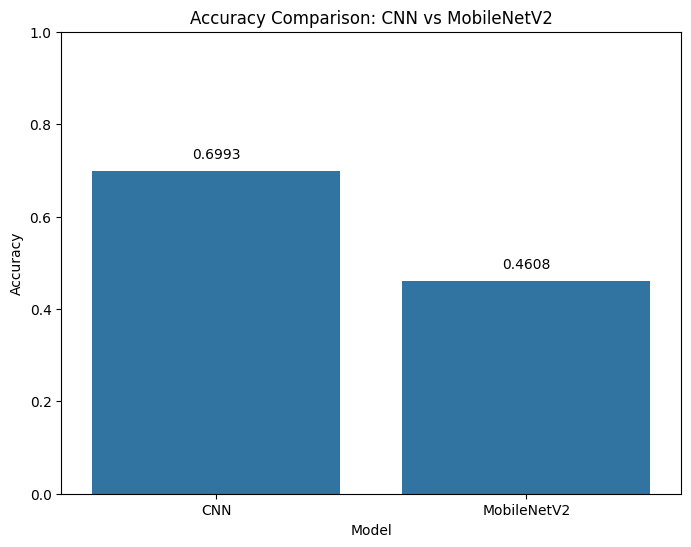

In [ ]:
import seaborn as sns

# Data for the accuracy comparison
model_names = ['CNN', 'MobileNetV2']
accuracies = [cnn_test_acc, mobilenet_test_acc]

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Accuracy Comparison: CNN vs MobileNetV2')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for i in range(len(model_names)):
    plt.text(i, accuracies[i] + 0.02, f"{accuracies[i]:.4f}", ha='center', va='bottom')

plt.show()


This Bar plot compares the accuracy of CNN and MobileNetV2, making it easier to determine which model performs better for CIFAR-10 dataset

# **Conclusion**



*   The CNN model achieved a final accuracy of 0.6993, which is higher than MobileNetV2's accuracy of 0.4608

*  This visualization clearly shows that the CNN model outperforms MobileNetV2 in terms of accuracy for this task

